# 1. Source Code

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import glob

In [133]:
# 파일마다 모두 36 x 36 사이즈로 바꾸어 저장하는 함수입니다.
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size = (36,36)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [134]:
# data 를 load 하는 함수입니다.
# imgs matrix 에 img 를 추가하고, labels matrix 에 y_data 을 추가합니다. 
# y_data 는 다음과 같습니다. (가위 : 0, 바위 : 1, 보 : 2)
def load_data(img_path, number_of_data=300):
    img_size = 36
    color = 3
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path+ '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx = idx+1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx = idx+1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2   # 보 : 2
        idx = idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [135]:
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들입니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
# 파일마다 모두 36 x 36 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [136]:
# load_data() 함수로 만들어진 imgs 를 x_train 에, labels 를 y_train 에 각각 저장합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

# 입력 데이터는 0 ~ 255 의 값이므로, 255 로 나눠주어 0 ~ 1 사이의 값으로 정규화합니다.
x_train_norm = x_train/255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 36, 36, 3)
y_train shape: (300,)


라벨:  0


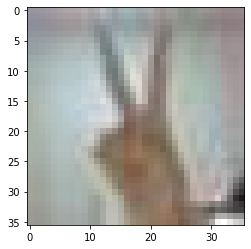

In [137]:
# train data 의 test code 입니다.
plt.imshow(x_train[70])
print('라벨: ', y_train[70])

In [138]:
# Deep Learning Network Model
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(40, (3,3), activation='relu', input_shape=(36,36,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(60, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 34, 34, 40)        1120      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 17, 17, 40)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 15, 15, 60)        21660     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 60)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2940)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 40)                117640    
_________________________________________________________________
dense_37 (Dense)             

In [161]:
# Training
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5895e-09 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 3.9736e-10 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1921e-09 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5895e-09 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.9868e-09 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1921e-0

In [140]:
# 학습이 끝난 모델의 성능을 측정하기 위해 Test data set 을 생성합니다.
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"

# 파일마다 모두 36 x 36 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

# load_data() 함수로 만들어진 imgs 를 x_test 에, labels 를 y_test 에 각각 저장합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
# 입력 데이터는 0 ~ 255 의 값이므로, 255 로 나눠주어 0 ~ 1 사이의 값으로 정규화합니다.
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 36, 36, 3)
y_test shape: (300,)


라벨:  0


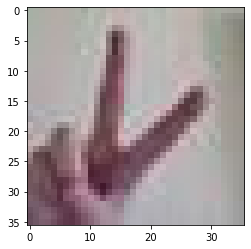

In [141]:
# # test data set 의 test code 입니다.
plt.imshow(x_test_norm[70])
print('라벨: ', y_test[70])

In [162]:
# evaluate 의 인자로 test data set 을 넣어 모델의 성능을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.6256 - accuracy: 0.7300
test_loss: 2.6256463527679443 
test_accuracy: 0.7300000190734863
